# Random Forest Classification

In [106]:
# Import sections
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

## I. Exploratory Data Analysis (EDA)

/var/folders/8q/jpyhxf1968g491b93p_py9v40000gn/T/ipykernel_33523/4132028560.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df.columns[-1], data = df, palette = 'Set2')


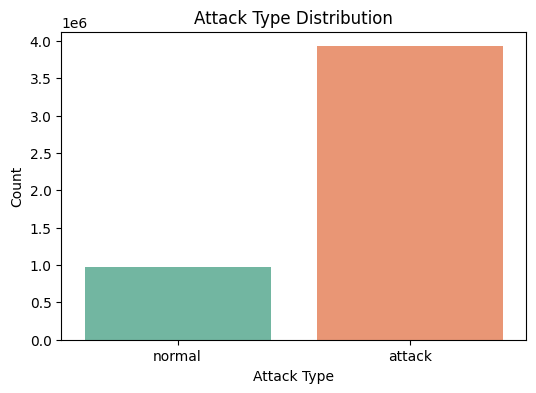

Attach distribution:
 attack_type
attack    3925650
normal     972781
Name: count, dtype: int64 

Attach percentage:
 attack_type
attack    80.14
normal    19.86
Name: count, dtype: float64 



In [108]:
# Load the dataset
# df = pd.read_csv('../../Data/kddcup.data_10_percent.csv', header = 0)
df = pd.read_csv('../../Data/kddcup.csv', header = 0)

# Analyze the dataset: Rate between normal and attack
df['attack_type'] = df[df.columns[-1]].apply(lambda x: 'normal' if x == 'normal' else 'attack')

attack_count = df[df.columns[-1]].value_counts()
attack_percentage = attack_count / len(df) * 100

plt.figure(figsize = (6, 4))
sns.countplot(x = df.columns[-1], data = df, palette = 'Set2')
plt.title('Attack Type Distribution')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()

print(f"Attach distribution:\n {attack_count} \n")
print(f"Attach percentage:\n {attack_percentage.round(2)} \n")

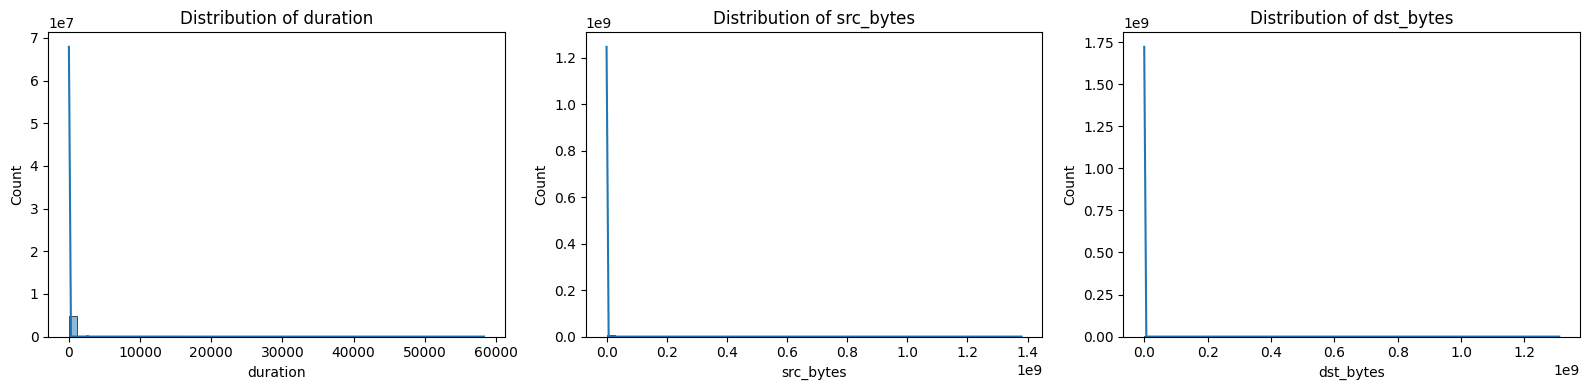

In [109]:
# Distribution of main features
features_to_plot = ['duration', 'src_bytes', 'dst_bytes']
plt.figure(figsize = (16, 4))
for i, feature in enumerate(features_to_plot):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[feature], bins = 50, kde = True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

/var/folders/8q/jpyhxf1968g491b93p_py9v40000gn/T/ipykernel_33523/331881934.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_labels.index[:10], y = top_labels.values[:10], palette = 'coolwarm')


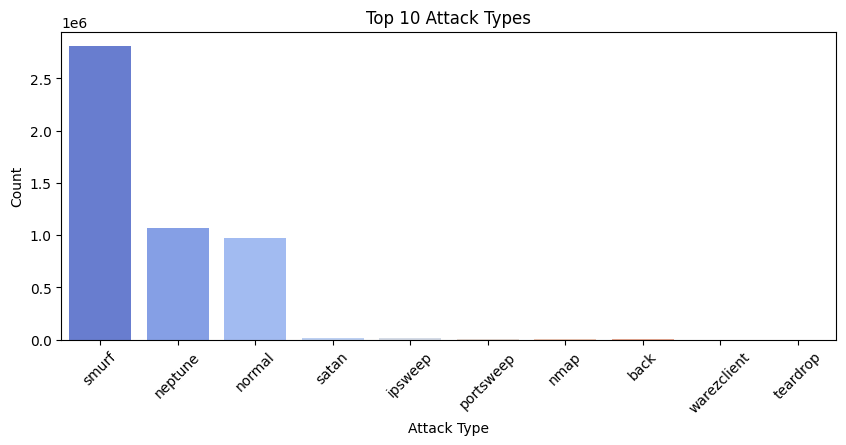

Total class:
 <bound method Series.unique of 0          normal
1          normal
2          normal
3          normal
4          normal
            ...  
4898426    normal
4898427    normal
4898428    normal
4898429    normal
4898430    normal
Name: label, Length: 4898431, dtype: object> 

label
smurf              2807886
neptune            1072017
normal              972781
satan                15892
ipsweep              12481
portsweep            10413
nmap                  2316
back                  2203
warezclient           1020
teardrop               979
pod                    264
guess_passwd            53
buffer_overflow         30
land                    21
warezmaster             20
imap                    12
rootkit                 10
loadmodule               9
ftp_write                8
multihop                 7
phf                      4
perl                     3
spy                      2
Name: count, dtype: int64


In [110]:
# Check imbalance of the dataset
plt.figure(figsize = (10, 4))
top_labels = df['label'].value_counts()
sns.barplot(x = top_labels.index[:10], y = top_labels.values[:10], palette = 'coolwarm')
plt.title('Top 10 Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

print(f"Total class:\n {df['label'].unique} \n")
print(df['label'].value_counts())

## II. Data preprocessing

In [111]:
# Encode categorical features
categorical_features = df.select_dtypes(include = ['object']).columns
df = pd.get_dummies(df, columns = categorical_features)

# Encode label
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df[df.columns[-1]])

# Determine features and target variable
X = df.drop(columns = [df.columns[-2], df.columns[-1]], axis = 1)
y = df[df.columns[-1]]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Print the shapes of the training and testing sets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

# Save the cleaned dataset to CSV
# df.to_csv('../../Cleaned_Data/kddcup_cleaned_data_10_percent.csv', index = False)

Training set shape: (3428901, 146), (3428901,)
Testing set shape: (1469530, 146), (1469530,)


## III. Random forest model and Evaluate

In [112]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42, class_weight = 'balanced')

rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted', zero_division = 0)
recall = recall_score(y_test, y_pred, average = 'weighted', zero_division = 0)
f1 = f1_score(y_test, y_pred, average = 'weighted', zero_division = 0)
roc_auc = roc_auc_score(pd.get_dummies(y_test), y_pred_proba, multi_class = 'ovr', average = 'weighted')

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1177554
           1       1.00      1.00      1.00    291976

    accuracy                           1.00   1469530
   macro avg       1.00      1.00      1.00   1469530
weighted avg       1.00      1.00      1.00   1469530



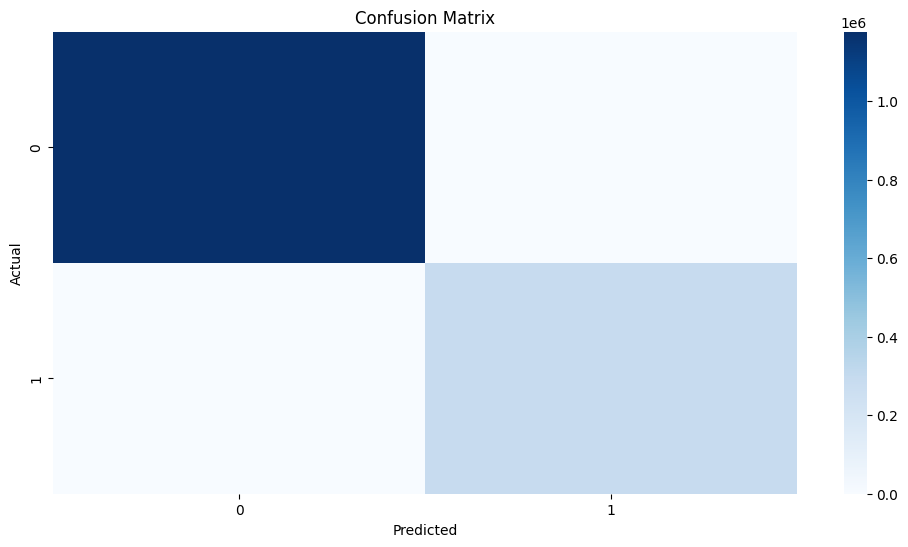

In [113]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division = 0))

# Confusion matrix
plt.figure(figsize = (12, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = False, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()